Bacis Ensemble Technique

Dataset : Breast Cancer Dataset

Models : Decision Tree Classifier, K NN (5) Classifier, Logistic Regression 

Techniques Used: 
        1. Voting <br>
        2. Weightage Voting<br>
        3. Average<br>
        4. Weightage Average

In [2]:
import sklearn
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

In [3]:
print(dataset.DESCR)
print(dataset.target_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
import numpy as np
X=np.asarray(dataset.data)
Y=np.asarray(dataset.target)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#len(X_train)=455, 400
#len(X_test)=144,100

114

In [13]:
from sklearn.utils import resample
X1_train,Y1_train=resample(X_train,Y_train,n_samples=400,replace=True,random_state=48)
X1_test,Y1_test=resample(X_test,Y_test,n_samples=100,replace=True,random_state=48)

X2_train,Y2_train=resample(X_train,Y_train,n_samples=400,replace=True,random_state=24)
X2_test,Y2_test=resample(X_test,Y_test,n_samples=100,replace=True,random_state=24)

X3_train,Y3_train=resample(X_train,Y_train,n_samples=400,replace=True,random_state=12)
X3_test,Y3_test=resample(X_test,Y_test,n_samples=100,replace=True,random_state=12)


In [14]:
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier()
decision_tree=decision_tree.fit(X1_train,Y1_train)


In [ ]:
#tree.plot_tree(decision_tree)
import graphviz 


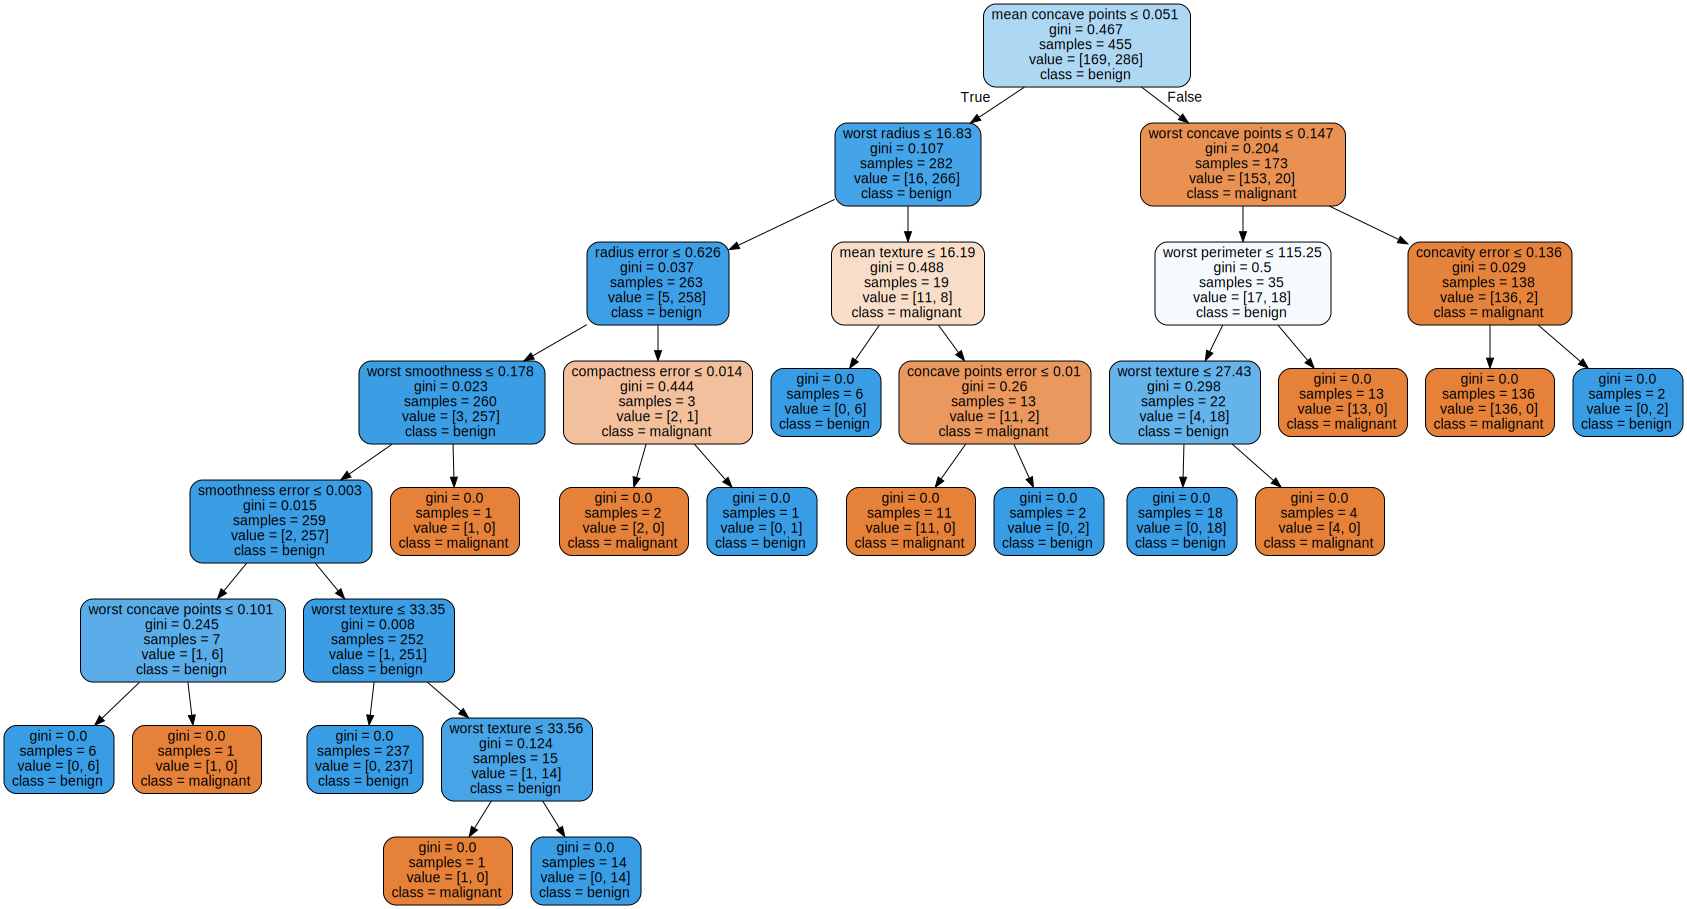

In [ ]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
...                      feature_names=dataset.feature_names,  
...                      class_names=dataset.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [15]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X2_train,Y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
 grap=neigh.kneighbors_graph(X_train)
 grap=grap.toarray()
 grap

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=50)
clf=clf.fit(X3_train,Y3_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
pred_decision_tree_Train=decision_tree.predict(X1_train)
pred_neigh_Train=neigh.predict(X2_train)
pred_clf_Train=clf.predict(X3_train)

In [18]:
pred_decision_tree_Test=decision_tree.predict(X1_test)
pred_neigh_Test=neigh.predict(X2_test)
pred_clf_Test=clf.predict(X3_test)

In [20]:
#stacking starts from here
import pandas as pd
prediction_train={"Decision Tree":pred_decision_tree_Train,
                  "Knn":pred_neigh_Train,
                  "logistic Regression":pred_clf_Train }

prediction_trains=pd.DataFrame(prediction_train)

prediction_trains.head(10)

,Decision Tree,Knn,logistic Regression
0,1,0,1
1,1,1,1
2,0,0,0
3,1,1,1
4,1,1,1
5,1,1,1
6,0,1,0
7,1,1,1
8,1,1,1
9,1,1,1


In [21]:
prediction_test={"Decision Tree":pred_decision_tree_Test,
                  "Knn":pred_neigh_Test,
                  "logistic Regression":pred_clf_Test }

prediction_tests=pd.DataFrame(prediction_test)

prediction_tests.head(10)

,Decision Tree,Knn,logistic Regression
0,1,1,1
1,0,1,1
2,1,1,0
3,1,0,0
4,1,1,0
5,1,1,1
6,1,0,0
7,0,0,1
8,0,1,1
9,1,1,0


In [25]:
stacking_model= LogisticRegression(random_state=0,max_iter=50)
stacking_model.fit(prediction_trains,Y2_train)
stacking_model.score(prediction_tests,Y2_test)

0.98

In [ ]:
#to stop over fitting use on test and predict on the test by stacking model
1. LOOCV
2. K-fold
3. create the dataset and do the same as above
4. can use this original dataset also in the test and train set
5. increase the layer of model
    3 -> 2 -> 1 
